# Trabalho Pático 2

### Ex.2:


2. Considere-se um circuito booleano $\,\mathcal{C}\,$ com $\,n\,$ “wires” de “input” e um único “wire” de output.
    - O circuito é descrito num bi-grafo com uma classe de nodos representando “gates” e a segunda classe representando “wires” . 
    - Cada nodo contém um campo val cujo conteúdo descreve a semântica desse nodo; para os “wires” o campo val  contém uma variável SCIP; para as “gates” o campo val  contém uma marca bo conjunto and, or,  xor e not,   que indica o tipo de “gate”. 
    - Com exceção de not , que é um operador unário, todas as restantes “gates” têm um número arbitrário de “inputs” e um único “output”.
    - No grafo os arcos com origem numa determinada “gate”  têm destino nos “wires” que são “input” dessa “gate”. Cada “wire” que não é “input” é origem de um único arco que tem como destino a “gate” do qual esse “wire” é “output”.
    - A semântica das várias “gates” é expressa em relações na Aritmética Linear Inteira, tal como está descrita em +Capítulo 2: Programação com Restrições (#LIA)

In [4]:
!pip install ortools
from ortools.linear_solver import pywraplp
import networkx as nx
from networkx import *
import random

>**a.**Escreva um programa que, a partir do número $\,n\,$ de “inputs”  e de um parâmetro positivo $\,\gamma\ll 1\,$ como argumentos,  gere aleatoriamente circuitos com “gates” or, and e not  em que o número de and's é  $\,\gamma\ast\,$ (número total de nodos).

Inicialmente criamos um grafo direcionado e uma lista onde vamos posteriormente adicionas os *gates*. Adicionamos os *wires* do *input* e ao adicionar os *gates* à lista, primeiro adicionamos os "and" e, só em seguida, adicionamos os "xor", os "not" e os "or". Criamos os *wires* que vão receber a informação dos gates e depois escolhemos um *output* e então removemos este da lista dos *wires* que podem ser usados. Ligamos os *inputs* a pelo menos um *gate* e, em seguida, ligamos os restantes *wires* a pelo menos um *gate*. Para finalizar, percorremos os gates e garantirmos que estes recebem dois *wires*.
O número de gates, como o seu tipo são escolhidos aleatoriamente.

In [40]:
#Função que devolve os gates que ainda podem receber wires
def getGate(G, Gates):
    return [gate for gate in Gates if G.in_degree(gate) < 2]

def constroi_grafo(Wires,Gama):
    #Criar o grafo e defenir o número de gates
    G = nx.DiGraph()
    Gates = random.randint(Wires+1,18)
    Gates_and = round(Gama*Gates)
    gates = []
    
    #Adicionar os wires do input ao grafo
    for wire in range(1,Wires+1):
        G.add_node(wire)
    inputs = [x for x in range(1, Wires+1)]

    #Adicionar os gates "and" à lista ao grafo
    for gate in range(1,Gates_and + 1):
        G.add_node(Wires + gate,gate="and")
        gates.append(Wires + gate)

    #Adicionar os restantes gates "xor", "not","or" ao grafo
    for gate in range(1,(Gates - Gates_and) + 1):
        tipo_gate = random.choice(["xor","not","or"])
        G.add_node(Wires + Gates_and + gate,gate=tipo_gate)
        gates.append(Wires + Gates_and + gate)

    #Criar os wires que vão receber informação dos gates 
    new_wires = []
    for gate in gates:
        Wires += 1
        G.add_edge(gate,Gates + Wires)
        new_wires.append((Gates + Wires))
    
    #Escolher um output e remover da lista dos wires que podem ser usados
    output = random.choice(new_wires)
    new_wires.remove(output)
    print(output)

    #Ligar os inputs a pelo menos um gate
    for input in inputs:
        free_gates = getGate(G, gates)
        if free_gates != []:
            gate = random.choice(free_gates)
            G.add_edge(input,gate)
    
    #Ligar o resto dos wires a pelo menos um gate
    for wire in new_wires:
        free_gates = getGate(G, gates)
        if free_gates != []:
            gate = random.choice(free_gates)
            while(G.has_edge(gate,wire) == True):
                gate = random.choice(free_gates)
            G.add_edge(wire,gate)
        
    #Percorrer os gates e garantir que recebem dois wires
    for gate in gates:
        if G.in_degree(gate) < 2:
            wire = random.choice(list(inputs + new_wires))
            G.add_edge(wire, gate)

    return G

24


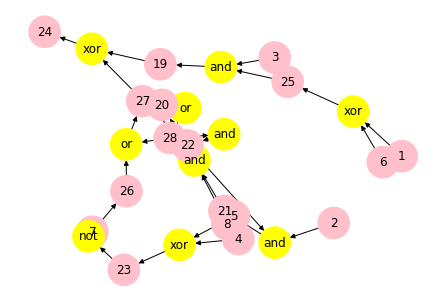

In [44]:
#Inputs
N = 8
Gama = 0.4
G =  constroi_grafo(N,Gama)
nx.draw(G,with_labels=True,labels={n:(G.nodes[n]['gate'] if 'gate' in G.nodes[n] else n) for n in G}, node_size=1000, node_color=['yellow' if 'gate' in G.nodes[n] else 'pink' for n in G])